<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Initialization-Cells:-Run-this-first!" data-toc-modified-id="Initialization-Cells:-Run-this-first!-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Initialization Cells: Run this first!</a></span></li><li><span><a href="#Training-a-nn-to-differentiate-between-two-categories" data-toc-modified-id="Training-a-nn-to-differentiate-between-two-categories-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Training a nn to differentiate between two categories</a></span><ul class="toc-item"><li><span><a href="#Create-the-training-dataset" data-toc-modified-id="Create-the-training-dataset-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Create the training dataset</a></span></li><li><span><a href="#Training-a-minimal-single-hidden-layer,-single-output-neural-network-with-linear-activation" data-toc-modified-id="Training-a-minimal-single-hidden-layer,-single-output-neural-network-with-linear-activation-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Training a <em>minimal</em> single hidden layer, single output neural network with linear activation</a></span></li><li><span><a href="#Does-changing-the-activation-function-from-linear-to-non-linear-make-a-difference?" data-toc-modified-id="Does-changing-the-activation-function-from-linear-to-non-linear-make-a-difference?-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Does changing the activation function from linear to non-linear make a difference?</a></span></li><li><span><a href="#Training-a-neural-network-with-multiple-hidden-layer--neurons" data-toc-modified-id="Training-a-neural-network-with-multiple-hidden-layer--neurons-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Training a neural network with multiple hidden layer  neurons</a></span></li><li><span><a href="#Does-increasing-the-number-of-layers-always-help?" data-toc-modified-id="Does-increasing-the-number-of-layers-always-help?-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Does increasing the number of layers always help?</a></span></li></ul></li><li><span><a href="#Exercise:-Design-a-deep-neural-network-to-classify-the-spiral-dataset" data-toc-modified-id="Exercise:-Design-a-deep-neural-network-to-classify-the-spiral-dataset-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Exercise: Design a deep neural network to classify the spiral dataset</a></span><ul class="toc-item"><li><span><a href="#How-are-deep-neural-networks-designed-in-practice?" data-toc-modified-id="How-are-deep-neural-networks-designed-in-practice?-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>How are deep neural networks designed in practice?</a></span></li></ul></li><li><span><a href="#Learning-to-recognize-handwriting" data-toc-modified-id="Learning-to-recognize-handwriting-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Learning to recognize handwriting</a></span><ul class="toc-item"><li><span><a href="#Probability-vectors-and-the-softmax-function" data-toc-modified-id="Probability-vectors-and-the-softmax-function-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Probability vectors and the softmax function</a></span></li><li><span><a href="#Neural-network-with-a-single-hidden-layer-and-softmax-output" data-toc-modified-id="Neural-network-with-a-single-hidden-layer-and-softmax-output-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Neural network with a single hidden layer and softmax output</a></span></li><li><span><a href="#A-deeper-two-hidden-layer-model-with-softmax-output" data-toc-modified-id="A-deeper-two-hidden-layer-model-with-softmax-output-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>A deeper two-hidden-layer model with softmax output</a></span></li><li><span><a href="#Training-with-MSE-loss-instead-of-cross-entropy-loss" data-toc-modified-id="Training-with-MSE-loss-instead-of-cross-entropy-loss-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Training with MSE loss instead of cross-entropy loss</a></span></li></ul></li><li><span><a href="#Additional-exercises" data-toc-modified-id="Additional-exercises-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Additional exercises</a></span><ul class="toc-item"><li><span><a href="#Sensitivity-to-optimizer-and-learning-rate" data-toc-modified-id="Sensitivity-to-optimizer-and-learning-rate-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Sensitivity to optimizer and learning rate</a></span></li><li><span><a href="#Design-challenge" data-toc-modified-id="Design-challenge-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Design challenge</a></span></li><li><span><a href="#Using-your-trained-network-to-recognize-your-handwriting" data-toc-modified-id="Using-your-trained-network-to-recognize-your-handwriting-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Using your trained network to recognize your handwriting</a></span></li><li><span><a href="#Example-of-a-digit-in-your-writing-that-is-correctly-recognized" data-toc-modified-id="Example-of-a-digit-in-your-writing-that-is-correctly-recognized-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Example of a digit in your writing that is correctly recognized</a></span></li><li><span><a href="#Example-of-a-digit-in-your-writing-that-is-incorrectly-recognized" data-toc-modified-id="Example-of-a-digit-in-your-writing-that-is-incorrectly-recognized-5.5"><span class="toc-item-num">5.5&nbsp;&nbsp;</span>Example of a digit in your writing that is <em>incorrectly</em> recognized</a></span></li><li><span><a href="#(optional)-Convolution-neural-network" data-toc-modified-id="(optional)-Convolution-neural-network-5.6"><span class="toc-item-num">5.6&nbsp;&nbsp;</span>(optional) Convolution neural network</a></span></li></ul></li></ul></div>

# Initialization Cells: Run this first!

In [1]:
using Plots, Interact
gr(
    markerstrokewidth=0.5,
    markerstrokecolor=:white,
    alpha=0.7
)
using Flux, Flux.Data.MNIST ## this is the Julia package for deep learning 
using Flux: onehotbatch, argmax, crossentropy, throttle, mse
using Base.Iterators: repeated, partition

HTML{String}("<script>\n// Immediately-invoked-function-expression to avoid global variables.\n(function() {\n    var warning_div = document.getElementById(\"webio-warning-4695979901914238960\");\n    var hide = function () {\n        var script = document.getElementById(\"webio-setup-15052437119852286540\");\n        var parent = script && script.parentElement;\n        var grandparent = parent && parent.parentElement;\n        if (grandparent) {\n            grandparent.style.display = \"none\";\n        }\n        warning_div.style.display = \"none\";\n    };\n    if (typeof Jupyter !== \"undefined\") {\n        console.log(\"WebIO detected Jupyter notebook environment.\");\n        // Jupyter notebook.\n        var extensions = (\n            Jupyter\n            && Jupyter.notebook.config.data\n            && Jupyter.notebook.config.data.load_extensions\n        );\n        if (extensions && extensions[\"webio-jupyter-notebook\"]) {\n            // Extension already loaded.\n            console.log(\"Jupyter WebIO nbextension detected; not loading ad-hoc.\");\n            hide();\n            return;\n        }\n    } else if (window.location.pathname.includes(\"/lab\")) {\n        // Guessing JupyterLa\n        console.log(\"Jupyter Lab detected; make sure the @webio/jupyter-lab-provider labextension is installed.\");\n        hide();\n        return;\n    }\n})();\n\n</script>\n<p\n    id=\"webio-warning-4695979901914238960\"\n    class=\"output_text output_stderr\"\n    style=\"padding: 1em; font-weight: bold;\"\n>\n    Unable to load WebIO. Please make sure WebIO works for your Jupyter client.\n    For troubleshooting, please see <a href=\"https://juliagizmos.github.io/WebIO.jl/latest/providers/ijulia/\">\n    the WebIO/IJulia documentation</a>.\n    <!-- TODO: link to installation docs. -->\n</p>\n")

# Training a nn to differentiate between two categories

We now consider an example where the two classes are not linearly separable. The function in the next code cell generates two training datasets comprised of $N$ points belonging to Class 1 and $N$ points belonging to Class 2. Points in Class 1 (roughly) lie on a circle with radius `r1`, while points in Class 2 (roughly) lie on a circle with radius `r2`. 

In [2]:
function generatedata_circle(r1, r2, N, σ=0.1)
    ϕ1 = LinRange(0, 2 * π, N)
    ϕ2 = LinRange(0, 2 * π, N)
    rx1 = r1 .+ σ * randn(N)
    rx2 = r2 .+ σ * randn(N)
    X1 = [rx1 .* cos.(ϕ1) rx1 .* sin.(ϕ1)]
    X2 = [rx2 .* cos.(ϕ2) rx2 .* sin.(ϕ2)]
    return X1', X2'
end

generatedata_circle (generic function with 2 methods)

The code in the next cell generates samples for Class 1 and Class 2 and plots them on the 2-D plane. 

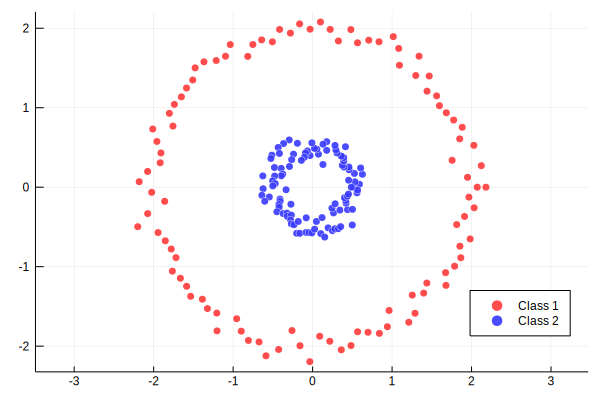

In [3]:
X1c, X2c = generatedata_circle(2, 0.5, 100)
p1 = scatter(
    X1c[1, :], X1c[2, :];
    color="red",
    label="Class 1",
    aspectratio=:equal
)
scatter!(
    X2c[1, :], X2c[2, :];
    color="blue", 
    label="Class 2",
    legend=:bottomright
)

## Create the training dataset

Let's create a training dataset by concatenating the datasets together. 

In [4]:
X = [X1c X2c]

2×200 Array{Float64,2}:
 2.18087  1.94965   2.12283   1.75537   2.02885   …   0.565603    0.487025   
 0.0      0.123904  0.270913  0.338319  0.526413     -0.0359451  -1.19287e-16

Then we associate the classes with labels: Class 1 is "+1", and Class 2 is "-1". 

In [5]:
Y = [ones(1, size(X1c, 2)) -ones(1, size(X2c, 2))]

1×200 Array{Float64,2}:
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  …  -1.0  -1.0  -1.0  -1.0  -1.0  -1.0

## Training a *minimal* single hidden layer, single output neural network with linear activation

Our goal is to design a neural network that takes 2-dimensional vectors from the training dataset for Class 1 and maps them "as close as possible" to "+1", and maps elements of Class 2 "as close as possible" to "-1". 

We will begin by using the mean squared error `mse` loss function and a `Dense` network with linear activation function. 

The command 
```julia
Dense(10, 2, relu)

```
produces a dense (i.e. fully-connected) layer with 10 input neurons and 2 outputs, and a `relu` activation function for each output neuron. Replacing `relu` with `σ` changes the activation function to the sigmoidal activation function.

The command 
```julia
Dense(10, 2)

```
(without the last argument) produces a fully-connected layer with 10 input neurons and a *linear* activation function.

Other activation functions can be used -- see the [documentation](https://github.com/FluxML/Flux.jl/blob/master/docs/src/models/layers.md)

Examples include:

* `σ`
* `relu`
* `leakyrelu`
* `elu`
* `swish`

Before we train a neural network in `Flux`, we must:

1. create a input-output model
2. create a loss function 
3. package the data tuples of input-output against which the loss function can be evaluated

**Exercise**: 

Initialize a single output, linear neural network by filling in the `??` in the  cell below.

In [6]:
m = Chain(Dense(2, 1)) ## TODO: Replace ?? -- Hint: What should it be for the dataset? 

Chain(Dense(2, 1))

The model is initialized with random weights. Let us pass as an input the matrix `X`. If you have set up the model correctly, the output should match the dimension.

In [7]:
println("Output has size $(size(m(X), 2))")

Output has size 200


Next we define the loss and loss function. 

In [8]:
loss(x, y) = mse(m(x), y) 

loss (generic function with 1 method)

We now package the dataset into `(X,Y)` tuples.

In [9]:
iters = 500
dataset = repeated((X, Y), iters)

Base.Iterators.Take{Base.Iterators.Repeated{Tuple{Array{Float64,2},Array{Float64,2}}}}(Base.Iterators.Repeated{Tuple{Array{Float64,2},Array{Float64,2}}}(([2.18087 1.94965 … 0.565603 0.487025; 0.0 0.123904 … -0.0359451 -1.19287e-16], [1.0 1.0 … -1.0 -1.0])), 500)

To train the network, we need to specify an optimizer. [Choices are](https://github.com/FluxML/Flux.jl/blob/master/docs/src/training/optimisers.md)

* `Descent`
* `Momentum`
* `Nesterov`
* `ADAM`

(Most of these should sound familiar from what we've learned previously!) The learning rates for these optimizers can be set explicitly or implicitly. To use ADAM, for example:

```julia
opt = ADAM() 

```

The syntax to train a model is

``` julia
Flux.train!(loss, params(m), dataset, opt; cb=throttle(evalcb, 0.01))

```
where the `cb=throttle(evalcb, 0.01)` sets a "callback" which shows the output of the `evalcb` function every 0.01 seconds.

We are now ready to train the network with the defined loss function and the `ADAM` optimizer as below.

In [10]:
opt = ADAM()
evalcb = () -> @show([loss(X, Y)])
Flux.train!(loss, params(m), dataset, opt; cb=throttle(evalcb, 0.01))

[loss(X, Y)] = Tracker.TrackedReal{Float64}[3.44932]
[loss(X, Y)] = Tracker.TrackedReal{Float64}[3.23156]
[loss(X, Y)] = Tracker.TrackedReal{Float64}[3.02431]
[loss(X, Y)] = Tracker.TrackedReal{Float64}[2.82829]
[loss(X, Y)] = Tracker.TrackedReal{Float64}[2.70589]
[loss(X, Y)] = Tracker.TrackedReal{Float64}[2.55037]
[loss(X, Y)] = Tracker.TrackedReal{Float64}[2.3969]
[loss(X, Y)] = Tracker.TrackedReal{Float64}[2.24712]
[loss(X, Y)] = Tracker.TrackedReal{Float64}[2.1227]
[loss(X, Y)] = Tracker.TrackedReal{Float64}[2.01283]
[loss(X, Y)] = Tracker.TrackedReal{Float64}[1.8965]


We now display the decision boundaries associated with the learned neural network. To that end, we will create the function in the next cell.

In [11]:
function display_decision_boundaries(X1c, X2c, m, x1range, x2range, τ=0.0)
    D = [(m([x1; x2]).data)[1] for x2 in x2range, x1 in x1range] 
    heatmap(x1range, x2range, sign.(D .- τ); color=:grays, xlim = [minimum(x1range),maximum(x1range)], ylim = [minimum(x2range),maximum(x2range)]) 
    scatter!(X1c[1, :], X1c[2, :], color="red", label="Class 1", aspectratio=:1.0)
    scatter!(X2c[1, :], X2c[2, :], color="blue", label="Class 2")
end

display_decision_boundaries (generic function with 2 methods)

We now display the decision boundary. The elements in white  correspond to the portion of the 2-D plane that we assign to the label "+1", *i.e.*, Class 1. The elements in black correspond correspond to the portion of the 2-D plane that we assign to the label "-1", *i.e.*, Class 2.   

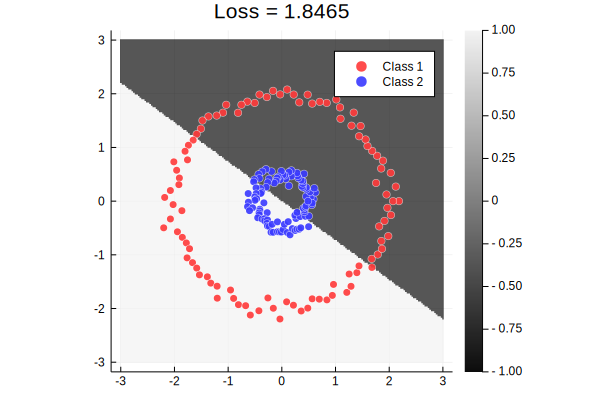

In [12]:
x1range = range(-3; stop=3, length=200)
x2range = range(-3; stop=3, length=200)
display_decision_boundaries(X1c, X2c, m, x1range, x2range)
plot!(; title="Loss = $(round(Tracker.data(loss(X,Y)), digits=4))")

Let us try to understand why the network did not properly classify the boundaries, even with more iterations.

Indeed. We can retreive the parameters learned using the commands in the next cell. 

In [13]:
@show m.layers[1].W
@show m.layers[1].b
@show m.layers[1].σ;

(m.layers[1]).W = Float32[-0.525488 -0.717576] (tracked)
(m.layers[1]).b = Float32[0.0024713] (tracked)
(m.layers[1]).σ = identity


That the network we designed is a linear network is confirmed by the `(m.layers[1]).σ = identity` output.

## Does changing the activation function from linear to non-linear make a difference?

We now make the network non-linear by utilizing the `relu` activation function. We retain the same structure though. 

In [14]:
m = Chain(Dense(2, 1, relu)) ## TODO: Replace ?? 

loss_fn = mse
loss(x, y) = loss_fn(m(x), y) 

iters = 5000
dataset = Base.Iterators.repeated((X, Y), iters)

opt = ADAM() 
evalcb = () -> @show([loss(X, Y)])
Flux.train!(loss, params(m), dataset, opt; cb=throttle(evalcb, 0.1))

[loss(X, Y)] = Tracker.TrackedReal{Float64}[1.08469]
[loss(X, Y)] = Tracker.TrackedReal{Float64}[0.839544]
[loss(X, Y)] = Tracker.TrackedReal{Float64}[0.835203]
[loss(X, Y)] = Tracker.TrackedReal{Float64}[0.834085]
[loss(X, Y)] = Tracker.TrackedReal{Float64}[0.83376]
[loss(X, Y)] = Tracker.TrackedReal{Float64}[0.833715]
[loss(X, Y)] = Tracker.TrackedReal{Float64}[0.833713]
[loss(X, Y)] = Tracker.TrackedReal{Float64}[0.833713]
[loss(X, Y)] = Tracker.TrackedReal{Float64}[0.833713]
[loss(X, Y)] = Tracker.TrackedReal{Float64}[0.833713]
[loss(X, Y)] = Tracker.TrackedReal{Float64}[0.833713]


In [15]:
println("Output has size $(size(m(X), 2))")

Output has size 200


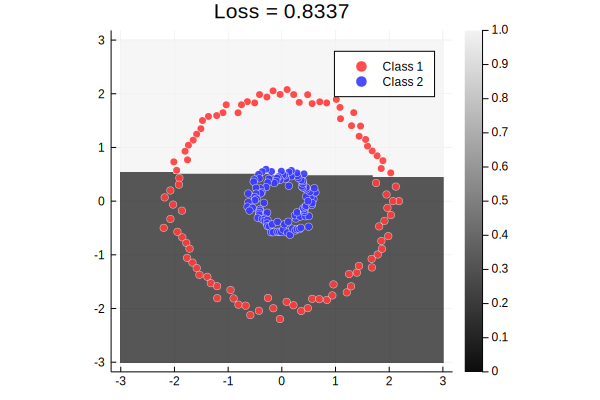

In [16]:
display_decision_boundaries(X1c, X2c, m, x1range, x2range)
plot!(; title="Loss = $(round(Tracker.data(loss(X,Y)), digits=4))")

The cell below changes the activation function to the sigmoid activation function.

In [17]:
m = Chain(Dense(2, 1, sigmoid)) ## TODO: Replace ?? 

loss_fn = mse
loss(x, y) = loss_fn(m(x), y) 

iters = 5000
dataset = Base.Iterators.repeated((X, Y), iters)

opt = ADAM() 
evalcb = () -> @show([loss(X,Y)])
Flux.train!(loss, params(m), dataset, opt; cb=throttle(evalcb, 0.1))

[loss(X, Y)] = Tracker.TrackedReal{Float64}[1.3313]
[loss(X, Y)] = Tracker.TrackedReal{Float64}[1.17713]
[loss(X, Y)] = Tracker.TrackedReal{Float64}[1.09883]
[loss(X, Y)] = Tracker.TrackedReal{Float64}[1.05749]
[loss(X, Y)] = Tracker.TrackedReal{Float64}[1.01951]
[loss(X, Y)] = Tracker.TrackedReal{Float64}[0.981316]
[loss(X, Y)] = Tracker.TrackedReal{Float64}[0.954663]
[loss(X, Y)] = Tracker.TrackedReal{Float64}[0.931821]
[loss(X, Y)] = Tracker.TrackedReal{Float64}[0.913671]
[loss(X, Y)] = Tracker.TrackedReal{Float64}[0.8986]
[loss(X, Y)] = Tracker.TrackedReal{Float64}[0.888103]
[loss(X, Y)] = Tracker.TrackedReal{Float64}[0.879197]


In [18]:
println("Output has size $(size(m(X), 2))")

Output has size 200


We now display the decision boundary.

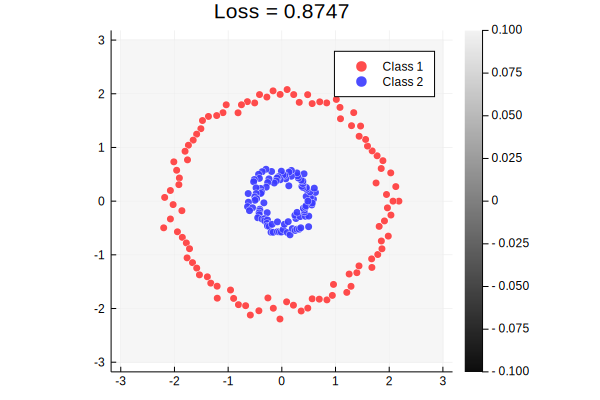

In [19]:
display_decision_boundaries(X1c, X2c, m, x1range, x2range)
plot!(; title="Loss = $(round(Tracker.data(loss(X,Y)), digits=4))")

## Training a neural network with multiple hidden layer  neurons

We now train a deeper network. We shall do so by utilizing the `Chain` command. The command

```julia
Chain(Dense(10, 2, relu), Dense(2, 2))
```
chains a Dense 10x2 layer with a relu activation function with a Dense 2x2 layer with a linear activation function.

**Important**: The number of input neurons of a layer has to match the number of output networks of the preceding layer!

For example,
```julia
Chain(Dense(2, 10, relu), Dense(2, 2))
```
does not constitute a valid network.

**Exercise**:

Design a network with the first hidden layer containing $n$ neurons and a sigmoidal activation function, that connects to an output layer containing one neuron and a linear activation function. Change the number of neurons till the loss function is small enough. Be careful not to set the number too high at first -- you could be waiting a long time!

In [20]:
n = 12 ## TODO: number of neurons in hidden layer 
active_fun = σ 

m = Chain(Dense(2, n, active_fun),Dense(n, 1)) ##TODO: Replace ?? 

loss_fn = mse
loss(x, y) = loss_fn(m(x), y) 

iters = 10000
dataset = Base.Iterators.repeated((X, Y), iters)

opt = ADAM()

evalcb = () -> @show([loss(X, Y)])
Flux.train!(loss, params(m), dataset, opt; cb=throttle(evalcb, 0.5))

lossXY = loss(X,Y).data

[loss(X, Y)] = Tracker.TrackedReal{Float64}[1.53624]
[loss(X, Y)] = Tracker.TrackedReal{Float64}[0.920026]
[loss(X, Y)] = Tracker.TrackedReal{Float64}[0.230549]
[loss(X, Y)] = Tracker.TrackedReal{Float64}[0.0143505]
[loss(X, Y)] = Tracker.TrackedReal{Float64}[0.00914158]
[loss(X, Y)] = Tracker.TrackedReal{Float64}[0.00875892]
[loss(X, Y)] = Tracker.TrackedReal{Float64}[0.00848766]
[loss(X, Y)] = Tracker.TrackedReal{Float64}[0.00810357]
[loss(X, Y)] = Tracker.TrackedReal{Float64}[0.00751028]
[loss(X, Y)] = Tracker.TrackedReal{Float64}[0.00685988]
[loss(X, Y)] = Tracker.TrackedReal{Float64}[0.00635412]
[loss(X, Y)] = Tracker.TrackedReal{Float64}[0.00589586]


0.005797847487613979

In [21]:
println("Training loss is $(lossXY[end])")

Training loss is 0.005797847487613979


We now display the decision boundaries.

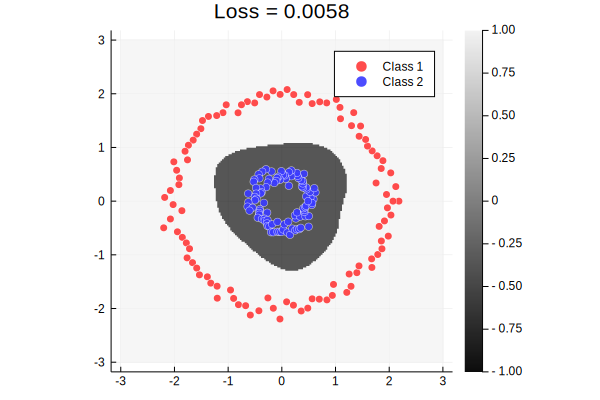

In [22]:
display_decision_boundaries(X1c, X2c, m, x1range, x2range)
plot!(; title="Loss = $(round(lossXY[end], digits=4))")

In the next cell we examine how the learning depends on the parameters such as the number of neurons, the number of iterations for which we run the algorithm and the choice of activation function.

In [ ]:
loss_fn = mse
@manipulate for n in (4, 8, 16, 32), iters in (10, 100, 5000, 10000), active_fun in (σ, relu)
    m = Chain(Dense(2, n, active_fun), Dense(n, 1)) ##TODO: Replace ?? 
    
    loss(x, y) = loss_fn(m(x), y) 
    dataset = Base.Iterators.repeated((X, Y), iters)
    
    opt = ADAM() 
    Flux.train!(loss, params(m), dataset, opt)
    
    display_decision_boundaries(X1c, X2c, m, x1range, x2range)
    
    lossXY = loss(X,Y).data
    plot!(; title="n = $n, Loss = $(round(lossXY, sigdigits = 5)), Iters = $iters")
end

## Does increasing the number of layers always help?

In the cell below we chain another linear dense layer after the first hidden layer of the previous network.

**Exercise**

Replace the ?? and pick the smallest value of `n` that makes the network learn.

In [ ]:
n = 4  ##TODO: Replace ??. Start with 2
iters = 15000

active_fun = σ 
m = Chain(Dense(2,n,active_fun),Dense(n, n),Dense(n, 1))  

loss_fn = mse
loss(x, y) = loss_fn(m(x), y) ## replace with mse

dataset = Base.Iterators.repeated((X, Y), iters)
opt = ADAM() ## replace with SGD, Nesterov

evalcb = () -> @show([loss(X,Y)])
Flux.train!(loss, params(m), dataset, opt; cb=throttle(evalcb, 0.5))

In [ ]:
lossXY = loss(X,Y).data
println("Training loss is $(lossXY)")

In [ ]:
display_decision_boundaries(X1c, X2c, m, x1range, x2range)
plot!(; title="Loss = $(round(lossXY, digits=4))")

In [ ]:
println("Number of neurons in hidden layer equals $(n)")

Now we train the same network with a `relu` activation function in each layer. Increase $n$ till the network learns -- but do not change the architecture.

In [ ]:
n = 3 ## TODO: Change till network learns 

active_fun = relu

m = Chain(Dense(2, n, active_fun), Dense(n, n, active_fun), Dense(n, 1, active_fun)) 

loss_fn = mse
loss(x, y) = loss_fn(m(x), y) 

iters = 10000

dataset = Base.Iterators.repeated((X, Y), iters)
opt = ADAM() 

evalcb = () -> @show([loss(X, Y)])
Flux.train!(loss, params(m), dataset, opt; cb=throttle(evalcb, 0.5))

lossXY = loss(X, Y).data

In [ ]:
lossXY = loss(X,Y).data
println("Training loss is $(lossXY)")

We now display the decision boundaries. 

In [ ]:
display_decision_boundaries(X1c, X2c, m, x1range, x2range)
plot!(; title="Loss = $(round(lossXY, digits=4))")

**Exercise**:

Why does introducing the `relu` in the final layer break this network? This can be answered analytically!  

Hint: How is the output encoding of the network related to the encoding of the classes we have chosen?  


Because the output domain of relu functions is non-negative, however the output encoding of the network is sign function, so it will always map the output of relu in the final layer to 0 or 1. When the network produces a decision boundary that correctly separates the red and blue points,  the class 2 encoded as -1 goes through the network which will outputs 0. The relu in the final layer could never approximate the output well. Since the class 2 takes a half of the whole data, so the loss is about 0.5; however when the weights and bias are intialized inproperly, most of neruon will be killed(no backpropagation through it, and it  will never be activated any more), in this case, the output of network will be zero, so both of class 1 and class 2 are unable to be classified and the loss is around 1.0.

Let us change the encoding of the class vector and see what happens.

In [ ]:
Yalt = [zeros(1, size(X1c, 2)) ones(1, size(X2c, 2))]

And now let us train the network. 

In [ ]:
n = 10
iters = 10000
active_fun = relu
m = Chain(Dense(2, n, active_fun),Dense(n, n, active_fun), Dense(n, 1, active_fun)) 

loss_fn = mse
loss(x, y) = loss_fn(m(x), y) 

dataset = Base.Iterators.repeated((X, Yalt), iters)

opt = ADAM() 
evalcb = () -> @show([loss(X, Yalt)])

Flux.train!(loss, params(m), dataset, opt; cb=throttle(evalcb, 0.5))

In [ ]:
lossXY = loss(X,Yalt).data
println("Training loss is $(lossXY)")

Now we display the decision boundary (again).

In [ ]:
display_decision_boundaries(X1c, X2c, m, 2 * x1range, 2 * x2range)
plot!(title = "Loss = $(round(lossXY, sigdigits = 5))")

# Exercise: Design a deep neural network to classify the spiral dataset 

We now consider a more complicated two-class classification example. 

In [ ]:
function generatedata_spiral(a, r, n)
    theta = LinRange(0, 4 * pi, n)
    x = zeros(2, n)
    for i in 1:n
        x[1, i] = a * (theta[i]^(1 / r)) * sin(theta[i])
        x[2, i] = a * (theta[i]^(1 / r)) * cos(theta[i])
    end
    return x
end

Each class is one arm of an [Archimedean spiral](https://en.wikipedia.org/wiki/Archimedean_spiral). We visualize this dataset next.

In [ ]:
X1c = generatedata_spiral(1, 1, 100)
X2c = generatedata_spiral(-1, 1, 100)
p1 = scatter(X1c[1, :], X1c[2, :]; color="red", label="Class 1", aspectratio=:1.0)
scatter!(X2c[1, :], X2c[2, :]; color="blue", label="Class 2", legend=:bottomright)

Motivated by our insights from the previous exercise, we will code the class labels differently than "+1" and "-1". This gives us more versatility when chaining together blocks of a neural network. Choose the class labels and the decision boundary threshold accordingly in the next cell.   

In [ ]:
##TODO: Create training dataset
X = [X1c X2c]
Y = [0 * ones(1, size(X1c, 2)) 1 * ones(1, size(X2c, 2))] ## Fill in ?? Hint: Utilize insights from above
τ = 0.5 # decision boundary -- TODO: Fill in ?? based on how you populate Y and insights from earlier exercise
x1range = range(-20; stop=20, length=100)
x2range = range(-20; stop=20, length=100);

**Exercise**

Design a network to classify the spiral dataset. 

In [ ]:
active_fun = relu

n = 15 ## Keep smaller than 16
iters = 10000

m = Chain(Dense(2, n, active_fun),Dense(n, n, active_fun), Dense(n, 1, active_fun)) ##TODO: Replace ?? 

loss_fn = mse
loss(x, y) = loss_fn(m(x), y) ## replace with mse

evalcb = () -> @show([loss(X, Y)])
dataset = Base.Iterators.repeated((X, Y), iters)

opt = ADAM() 
Flux.train!(loss, params(m), dataset, opt; cb=throttle(evalcb, 0.5))

In [ ]:
lossXY = loss(X,Y).data
println("Training loss is $(lossXY)")

We need the number of numbers in your design to be fewer than 16. 

In [ ]:
println("Number of neurons equals $(n)")

Let us now display the decision boundary.

In [ ]:
display_decision_boundaries(X1c, X2c, m, x1range, x2range, τ)
plot!(; title="Loss = $(round(lossXY, digits=4))")

Now we experiment with designing a network that works as above except we just change the activation function.  Our goal is to create a network that works for both the `relu` and `sigmoid` activation functions.

In [ ]:
active_fun = sigmoid

m = Chain(Dense(2, n, active_fun),Dense(n, n, active_fun), Dense(n, 1, active_fun)) ##TODO: Start with same network as above before changing it

loss(x, y) = loss_fn(m(x), y) ## replace with mse
dataset = Base.Iterators.repeated((X, Y), iters)

opt = ADAM() 
evalcb = () -> @show([loss(X,Y)])

Flux.train!(loss, params(m), dataset, opt; cb=throttle(evalcb, 1))

In [ ]:
lossXY = loss(X,Y).data
println("Training loss is $(lossXY)")

In [ ]:
display_decision_boundaries(X1c, X2c, m, x1range, x2range, τ)
plot!(; title="Loss = $(round(lossXY, digits=4))")

## How are deep neural networks designed in practice?

Congratulations! You just designed two deep neural networks corresponding to two different architectures to classify the spiral dataset.

The design process allows you to make contact with how engineers design such networks in practice. 

Engineers in practice do this as well as excerpted below from [this article](https://www.quantamagazine.org/foundations-built-for-a-general-theory-of-neural-networks-20190131/).

![DNN](theory_deepnetwork.png) 

A deeper theory of deep learning is starting to take place, but as of now trial and error is still the way to go. The important point is that **many network configurations** can accomplish a good result.   

# Learning to recognize handwriting

We now illustrate how deep networks can learn to recognize handwriting. We first load the MNIST dataset. We load the training images of the digits 0-9, the corresponding labels. These are stored in the variables `X` and `labels` respectively in the next cell. We will test the accuracy of the classifier by determining a label for a set of (independent from the training data) test images using the trained neural network  andt then comparing this with the known label for each test image.  The test images and the test labels are stored in the `test_X` and `test_Y` variables in the next cell.

In [ ]:
imgs = MNIST.images()
labels = MNIST.labels()
X = hcat(float.(reshape.(imgs, :))...) 

test_X = hcat(float.(reshape.(MNIST.images(:test), :))...) 
test_Y = onehotbatch(MNIST.labels(:test), 0:9);

Here are the first 10 samples of the training dataset.

In [ ]:
@manipulate for sample_num in (1, 2, 3, 4, 5, 6, 7, 8, 9, 10)
    heatmap(
        reshape(X[:, sample_num], 28, 28);
        yflip=:true, 
        color=:grays,
        ticks=:none,
        aspect_ratio=:equal,
        showaxis=:false
    )
    plot!(; title="Label = $(labels[sample_num])")
end

And the associated "one hot encoded" labels.  This maps digit `0` to $e_1$, digit `1` to $e_2$ and so on. It is numerically more efficient to store $e_i$ as a `Boolean` vector of with `true` in the `i`-th element and `false` everywhere. This is the encoding produced by one-hot encoding the `labels` vector using the `onehotbatch` command as in the next cell.   

In [ ]:
Y = onehotbatch(labels, 0:9) 
Y[:, 1:5]

## Probability vectors and the softmax function

A vectort $x \in \mathbb{R}^{n}$ is a **probability vector** if its  elements are non-negative and

$$ \sum_{i} x_i = 1.$$

In other words, the sum of the elements of $x$ adds up to one. 

Clearly probability vectors are a subset of the set of real-valued vectors. 

The [`softmax`](https://en.wikipedia.org/wiki/Softmax_function) function takes as an input **any real-valued vector**  $x \in \mathbb{R}^{n}$ and returns as its output probability vectors. 

Since one-hot encoded vectors of the class labels are themselves probability vectors, we can thus design the neural network such that its output (post the soft-max layer) is as close as possible to the corresponding one-hot encoded vectors.

When we use such a softmax function, it is common to use the cross-entropy function to measure the closeness between the neural network output and the one-hot encodex vectors. The cross-entropy function is designed to measure the distance  between probability vectors in a way that is more natural than the mean-squared error between the vectors in a way does not consider the fact that vectors are probability vectors.  

To evaluate the performance of our network we create the function `accuracy`. The `oncold` function is the inverse of the `onehot` function and returns the index of the largest entry.

In [ ]:
using Statistics: mean
using Flux: onecold
accuracy(x, y) = mean(onecold(m(x)) .== onecold(y))

To create a callback function, as in the next cell,  that displays the loss function and the accuracy attained on the training dataset. 


In [ ]:
evalcb = () -> @show([Tracker.data(loss(X,Y)), accuracy(test_X, test_Y)])

## Neural network with a single hidden layer and softmax output  

We now train a dense linear network with the [`crossentropy`](https://en.wikipedia.org/wiki/Cross_entropy) loss function.



In [ ]:
loss_fn = crossentropy

m = Chain(Dense(28^2, 10), softmax) ##TODO: Replace the ?? Hint: How many labels are there?
loss(x, y) = loss_fn(m(x), y) 
opt = ADAM() 

**Exercise**:

 Train the single layer network until it attains an accuracy greater 85%.

Tip: If you do not meet the accuracy spec, then try training with more batches.

In what follows, the command

```julia
 dataset = [(X[:, i], Y[:, i]) for i in partition(shuffle(1:size(X, 2)), batch_size)]
```

first randomly shuffles the columns of `X` and then creates a dataset composed of `batch_size` sized partitions.

In [ ]:
using Flux: shuffle
epochs = 4 # each epoch is one pass through data 
batch_size = 32
for epoch_idx in 1:epochs 
    dataset = [(X[:, i], Y[:, i]) for i in partition(shuffle(1:size(X, 2)), batch_size)] # create mini-batches
    Flux.train!(loss, params(m), dataset, opt; cb=throttle(evalcb, 1.0))
end
## it takes a while for output to appear -- be patient :) 

In [ ]:
test_accuracy = accuracy(test_X, test_Y)
println("Test accuracy is $(test_accuracy)")

Let's look at the digits alongside the corresponding output of our trained neural network. The cell below scrolls through all samples in `test_X.

In [ ]:
@manipulate for idx in 1:size(test_X, 2)
    m_input = test_X[:, idx]
    correct_label = findfirst(test_Y[:, idx]) - 1
    m_output = m(m_input)

    plot(
        heatmap(
            reshape(m_input, 28, 28); 
            yflip=true, 
            color=:grays,
            colorbar=false,
            axis=false,
            title="Correct label: $(correct_label)"
            ),
        bar(
            m_output.data;
            xticks=(1:10, 0:9),
            ylim=(0, 1.0),
            linewidth=0,
            xlabel="Digit",
            ylabel="Network output",
            label="",
            title="Predicted label: $(onecold(m_output) - 1)"
            );
        size=(600, 300)
    )
end

Now let's look specifically at the samples which the network classifies incorrectly. There aren't too many of these, and if you look at how poorly some of these digits were written, it's easy to see why the network got it wrong. In most of these cases, you can determine the actual label by looking at the *second-highest* bar, since the network is effectively "torn between" two choices.

In [ ]:
incorrect_idx = Int64[]

for idx in 1:size(test_X, 2)
    m_input = test_X[:, idx]
    correct_label = findfirst(test_Y[:, idx]) - 1
    applied_label =  onecold(m(m_input)) - 1
    
    if correct_label != applied_label
        push!(incorrect_idx, idx)
    end
end

println("Number of incorrect examples = $(length(incorrect_idx))")
@manipulate for inc_idx in 1 : length(incorrect_idx)
    idx = incorrect_idx[inc_idx]
    m_input = test_X[:, idx]
    correct_label = findfirst(test_Y[:, idx]) - 1
    m_output = m(m_input)

    plot(
        heatmap(
            reshape(m_input, 28, 28); 
            yflip=true, 
            color=:grays,
            colorbar=false,
            axis=false,
            title="Correct label: $(correct_label)"
            ),
        bar(
            m_output.data;
            xticks=(1:10, 0:9),
            ylim=(0, 1.0),
            linewidth=0,
            xlabel="Digit",
            ylabel="Network Output",
            label = "",
            title="Predicted label: $(onecold(m_output) - 1)",
            color=:red
            );
        size=(600, 300)
    )
end

**Exercise**: Remark on the  characterstics of some of the digits that were classified incorrectly.

The shape of these digits are somewhat inregular and is also similar to other digits. Thus, network
may confuse themm with other digits

We now examine the weights learned.

In [ ]:
using LaTeXStrings
plots = []

kwargs = (
    :clim => (-0.2, 0.2),
    :yflip => true,
    :color => :grays,
    :aspect_ratio => :equal,
    :ticks => :off,
    :colorbar => :false,
    :showaxis => :false
)

for idx in 1:10
    push!(
        plots,
        heatmap(
            reshape(Tracker.data(m.layers[1].W[idx, :]), 28, 28);
            title="W_$(idx)",
            kwargs...
        )
    )
end
plot(plots...; layout=(2, 5), size=(950, 400))

**Exercise**:

Remark on the characteristics of the weight matrices learned.

There are some patterns in those heatmaps, some also are somewhat like the shape of digits, which
infers that they contain some information of digits.

## A deeper two-hidden-layer model with softmax output 

Next we train a two layer network with a `relu` activation function and `crosentropy` loss. 

In [ ]:
loss_fn = crossentropy

m2 = Chain(Dense(28^2, 10,relu),Dense(10,10),softmax) ##TODO: Replace the ?? Hint: How many labels are there?
loss(x, y) = loss_fn(m2(x), y) 
opt = ADAM()

**Exercise**:

 Train the two layer network till it attains an accuracy greater 92%

Tip: If you do not meet the accuracy spec, then keep training by adding more epochs and/or increasing the batch size.

In [ ]:
using Flux:shuffle
epochs = 1 # each epoch represents one pass through data
batch_size = 100
for epoch_idx in 1:epochs 
    dataset = [(X[:, i], Y[:, i]) for i in partition(shuffle(1:size(X,2)),batch_size)]
    Flux.train!(loss, params(m2), dataset, opt; cb=throttle(evalcb, 2))
end
## it takes a while for output to appear -- be patient and don't interrupt the kernel :) 

In [ ]:
test_accuracy = accuracy(test_X, test_Y)
println("Test accuracy is $(test_accuracy)")

Let's look again at some of the digits and corresponding outputs for this network.

In [ ]:
@manipulate for idx in 1:size(test_X, 2)
    m_input = test_X[:, idx]
    correct_label = findfirst(test_Y[:, idx]) - 1
    m_output = m2(m_input)

    plot(
        heatmap(
            reshape(m_input, 28, 28); 
            yflip=true, 
            color=:grays,
            colorbar=false,
            axis=false,
            title="Correct label: $(correct_label)"
            ),
        bar(
            m_output.data;
            xticks=(1:10, 0:9),
            ylim=(0, 1.0),
            linewidth=0,
            xlabel="Digit",
            ylabel = "Network output",
            label = "",
            title="Predicted label: $(onecold(m_output) - 1)"
            );
        size=(600, 300)
    )
end

And here again are the handwritten digits that were classified incorrectly:

In [ ]:
incorrect_idx = Int64[]

for idx in 1:size(test_X, 2)
    m_input = test_X[:, idx]
    correct_label = findfirst(test_Y[:, idx]) - 1
    applied_label =  onecold(m(m_input)) - 1
    
    if correct_label != applied_label
        push!(incorrect_idx, idx)
    end
end

println("Number of incorrect examples = $(length(incorrect_idx))")
@manipulate for inc_idx in 1 : length(incorrect_idx)
    idx = incorrect_idx[inc_idx]
    m_input = test_X[:, idx]
    correct_label = findfirst(test_Y[:, idx]) - 1
    m_output = m2(m_input)

    plot(
        heatmap(
            reshape(m_input, 28, 28); 
            yflip=true, 
            color=:grays,
            colorbar=false,
            axis=false,
            title="Correct label: $(correct_label)"
            ),
        bar(
            m_output.data;
            xticks=(1:10, 0:9),
            ylim=(0, 1.0),
            linewidth=0,
            xlabel="Digit",
            ylabel = "Network output",
            label = "",
            title="Predicted label: $(onecold(m_output) - 1)",
            color=:red
            );
        size=(600, 300)
    )
end

**Exercise**:

Remark on the characteristics of any digits that were incorrectly classified using a single layer and softmax output layer that are now correctly classified using the two layer + softmax network.


Some of the digits have loops and some are like other digits.

Finally, let's examine the parameters that have been learned.

In [ ]:
using LaTeXStrings
plots = []

kwargs = (
    :clim => (-0.2, 0.2),
    :yflip => true,
    :color => :grays,
    :aspect_ratio => :equal,
    :ticks => :off,
    :colorbar => :false,
    :showaxis => :false
)

for idx in 1:10
    push!(
        plots,
        heatmap(
            reshape(Tracker.data(m2.layers[1].W[idx, :]), 28, 28);
            title="W_$idx",
            kwargs...
        )
    )
end
plot(plots...; layout=(2, 5), size=(950, 400))

**Exercise**: Remark on the characteristics of the weight matrices learned, as you see from their heatmap display.


Although its hard to tell the patterns in those heatmaps in nacked eyes, they still have some
information of digits because they don't look like random noises and have some shape.

## Training with MSE loss instead of cross-entropy loss

Now let us change the loss function to `mse` instead of `crossentropy` in the next cell and train the network. 

In [ ]:
loss_fn = mse
m = Chain(Dense(28^2, 10,relu),Dense(10,10),softmax) ##TODO: Replace ?? 
loss(x, y) = loss_fn(m(x), y) ## replace with mse
opt = ADAM()

In [ ]:
batches = 100
dataset = Base.Iterators.repeated((X, Y), batches)
Flux.train!(loss, params(m), dataset, opt; cb=throttle(evalcb, 5))

The point here is that we actually care about the test accuracy more than the exact numbers attained in the loss. Knowing  the exact value of the  training loss is does not give any insight on test accuracy attained. This is why we need to separately test the model on a portion of the data that is not being used to train the model. This is referred to as **cross-validation**.

Indeed -- this is what makes neural networks remarkably versatile and ready-to-use for many applications! In practice, neural networks can be continually trained by seeding them with the weights learned earlier. To that end, the Open Neural Network Exchange Format [(ONXX)](https://onnx.ai/) is being developed to facilitate the sharing of neural network models across language platforms.

The state-of-the-art for handwritten digit recognition uses convolutional neural networks. These have a different configuration and we will discuss them next. 

# Additional exercises

##  Sensitivity to optimizer and learning rate

Training a neural network depends on many factors -- the optimizer plays a big role.


In the cell below, the optimizer is set in the command

```julia
opt = ADAM() 

```

Other choices are `SGD` (Stochastic Gradient Descent) and `Nesterov` (Nesterov accelerated gradient descesnt).

We can set  *learning rate* of the algorithm explicltly using the command

```julia
opt = ADAM(0.01) 

```
where we have set the rate to be 0.01. We can do the same for the other optimizers.

In the following cell we use a learning rate of 0.01. 

In [ ]:
loss_fn = mse
m = Chain(
         Dense(28^2, 32, relu), 
         Dense(32, 160, relu),
         Dense(160, 10, relu),
         softmax)  
loss(x, y) = loss_fn(m(x), y) ## replace with mse
opt = ADAM(0.01) 

**Exercise**:

Train the network with a learning rate of 0.01. What accuracy do we get?  Write down your answer.

The accuracy I got is 95.86%.

In [ ]:
batches = 100
dataset = Base.Iterators.repeated((X, Y), batches)
Flux.train!(loss, params(m), dataset, opt; cb=throttle(evalcb, 10))

**Exercise**:

Train the network with a learning rate of 1. What accuracy do we get?  Note your answer.

The accuracy I got is 65.41%.

In [ ]:
loss_fn = mse
m = Chain(Dense(28^2, 10), softmax)
batches = 50
loss(x, y) = loss_fn(m(x), y) ## replace with mse
dataset = Base.Iterators.repeated((X, Y), batches)
opt = ADAM(1) 
Flux.train!(loss, params(m), dataset, opt, cb = throttle(evalcb, 10))

In [ ]:
dataset = Base.Iterators.repeated((X, Y), batches)
Flux.train!(loss, dataset, opt; cb = throttle(evalcb, 10))

**Exercise**: 

Compare the accuracy attained with the previous example and collect your observations and findings. 

When the learning rate is 0.01, the accuracy is above 95%. When the learning rate is 1, the network
may update its weights too greately to get the lowest point. Thus, the performance of nueral network
is greatly affected by the learning rate. If the learning rate is too high, the network may update by a
large step or even fail to train; if the learning rate is too low, the network will takes long time to converge.

## Design challenge

**Exercise**:

Design a network to beat the 95% accuracy attained by the nearest neighbor based classification.

Experiment with adding more layers and changing the batch size.

In [ ]:
loss_fn = crossentropy
m = Chain(Dense(28^2, 256, relu), Dense(256, 256, relu), Dense(256, 24, relu), softmax)
loss(x, y) = loss_fn(m(x), y)
opt = ADAM(0.001) 

In [ ]:
batches = 100
dataset = Base.Iterators.repeated((X, Y), batches)
Flux.train!(loss, params(m), dataset, opt; cb=throttle(evalcb, 10))

In [ ]:
test_accuracy = accuracy(test_X, test_Y)
println("Test accuracy is $(test_accuracy)")

![Yay!](ud.jpg)

## Using your trained network to recognize your handwriting

Now use the network you trained to recognize your own handwriting.

In [ ]:
include("drawnumber.jl")

function extract_digit_data(app::Canvas)
    my_img_from_app = Gray.(image(app, (28, 28)))
    my_img_from_app = float(1 .- my_img_from_app)
    my_img = my_img_from_app
    my_img_vector = my_img[:]
    return my_img_vector
end

In [ ]:
app = Canvas()
hbox(
    app,
    map(app) do img_matrix
        if img_matrix === nothing
            return html"<b>Draw something!</b>"
        end
        digit = extract_digit_data(app)
        output = Flux.Tracker.data(m(digit))
    end
)

## Example of a digit in your writing that is correctly recognized

In [ ]:
##TODO: Your code here
digit = extract_digit_data(app)
output = m(digit).data
max_val, max_ind = findmax(output)
prediction = max_ind-1
plot(
heatmap(
reshape(digit, 28, 28);
yflip=true,
color=:grays,
colorbar=false,
axis=false,
title="prediction label: $(prediction)"
),
bar(
output;
xticks=(1:10, 0:9),
ylim=(0, 1.0),
linewidth=0,
xlabel="Digit",
ylabel = "Network output",
label = "",
title="Predicted label: $(prediction)"
);
size=(600, 300)
)

**Exercise**:


The neural network you trained achieved 95% accuracy on the test dataset. This would suggest that you get the correct prediction 95% of the time whenever you write something.

Comment on whether that matches your empirical observatios. Which digits were particularly difficult to get the network to correctly identify even though it clearly looked like the digit you intended. 


It doesn't match the my obervation. Even though the network achieved 95% accuracy on the test
dataset, it can't correctly predict my handwritting with the same probability. I find that digit 7 is the
hardest one to be correctly identified by the network.

## Example of a digit in your writing that is *incorrectly* recognized

In [ ]:
##TODO: Your code here 
app = Canvas()
hbox(
app,
map(app) do img_matrix
if img_matrix === nothing
return html"<b>Draw something!</b>"
end
end
)

In [ ]:
digit = extract_digit_data(app)
output = m(digit).data
max_val, max_ind = findmax(output)
prediction = max_ind-1
plot(
heatmap(
reshape(digit, 28, 28);
yflip=true,
color=:grays,
colorbar=false,
axis=false,
title="prediction label: $(prediction)"
),
bar(
output;
xticks=(1:10, 0:9),
ylim=(0, 1.0),
linewidth=0,
xlabel="Digit",
ylabel = "Network output",
label = "",
title="Predicted label: $(prediction)"
);
size=(600, 300)
)

**Exercise**:

Remark on how you can systematically produce wrong predictions of a handwritten using the deep network you have just trained. 

Hiot: What happens if you write the digit so that the center of the digit is closer to the boundaries of the box. Or if it occupies a smaller portion of the box. Remark on your experiments with this. 

Just write the digit close to the edge of the box, and the network probably cannot recognize it

## (optional) Convolution neural network

Convolutional neural networks overcome the obstacles above. Train and show that such a network does this.

Use code from [here](https://github.com/FluxML/model-zoo/blob/master/vision/mnist/conv.jl)

In [ ]:
##TODO: Train model here

In [ ]:
##TODO: illustrate it working on a handwritten exmaple where deep network failed from above